In [0]:
# importing our libraries as the last time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix

matplotlib.style.use('ggplot')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Labs/Breast cancer classifier/wdbc.data' , names = ['ID', 'Diagnosis' , 'radius','texture','perimeter','area','smoothness','compactness','concavity'
,'concave_points','symmetry','fractal_dimension','radiusSE','textureSE','perimeterSE','areaSE','smoothnessSE','compactnessSE','concavitySE','concave_pointsSE','symmetry_SE',
'fractional_dimenstionSE','radiusW','textureSW','perimeterW','areaW','smoothnessW','compactnessW','concavityW','concave_pointsW','symmetryW',
'fractional_dimensionsW'] )

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df.head()

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df = df.drop(['ID'],axis = 1)


B    357
M    212
Name: Diagnosis, dtype: int64


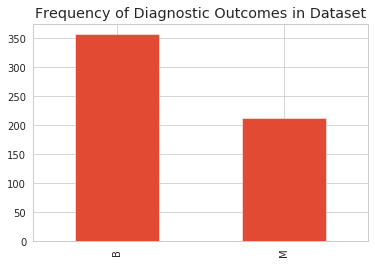

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW


In [0]:
# The ratio between B and M is the dataset is 1.7:1 as shown in the frequence bar
df['Diagnosis'].value_counts().plot(kind='bar')
print(df['Diagnosis'].value_counts())
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.show()
df_n = df[df['Diagnosis'] == 0]
df_y = df[df['Diagnosis'] == 1]


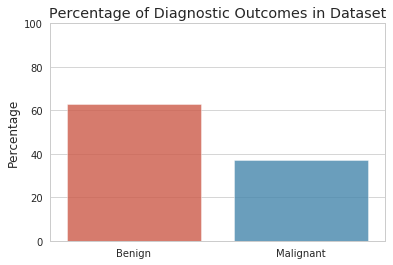

In [0]:
outcome_count = df.Diagnosis.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']
outcome_count['Percent'] = 100*outcome_count['Diagnosis']/sum(outcome_count['Diagnosis'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')
sns.barplot(x = ['Benign', 'Malignant'], y = 'Percent', data = outcome_count, alpha = .8)
plt.title('Percentage of Diagnostic Outcomes in Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

In [0]:
# to help in boxplots creation
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


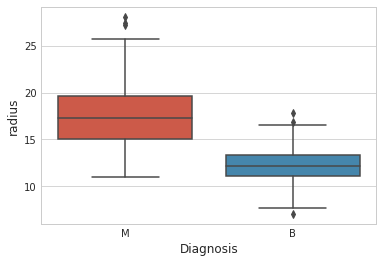

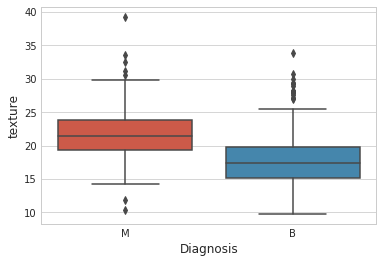

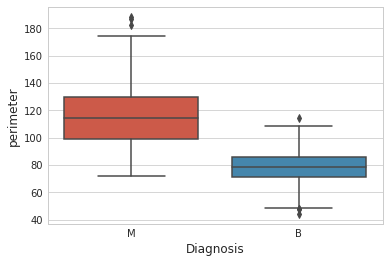

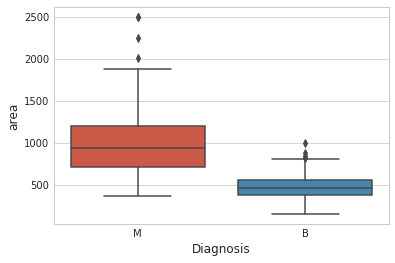

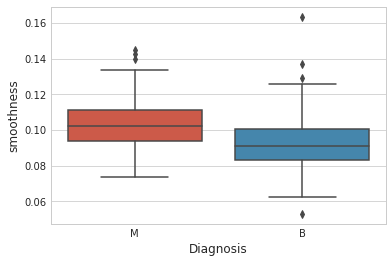

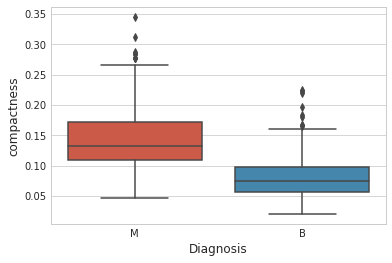

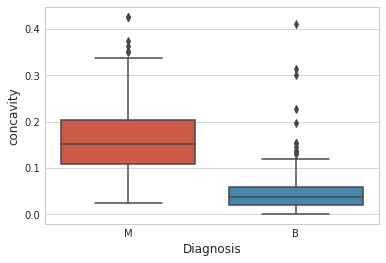

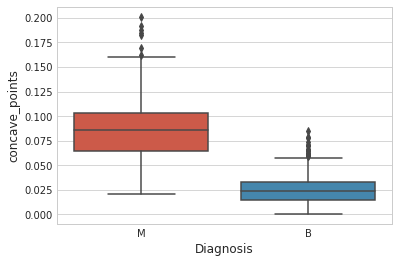

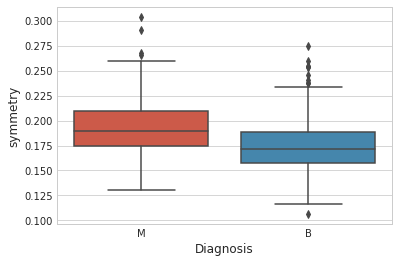

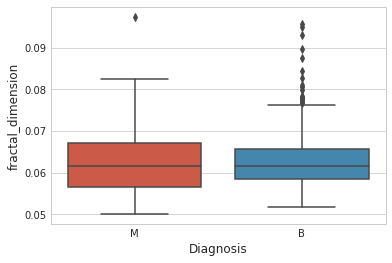

In [0]:
# here we notice that still we can notice that most benign cells have a smaller radius (thus area) than malignant cells. 
# The same thing goes with the concavity, benign cells tend to have less concavity than malignant cells.
for i in ('radius', 'texture', 'perimeter','area', 'smoothness','compactness','concavity'
,'concave_points', 'symmetry', 'fractal_dimension'):
  plt.figure()
  sns.boxplot(x='Diagnosis', y= i, data=df)


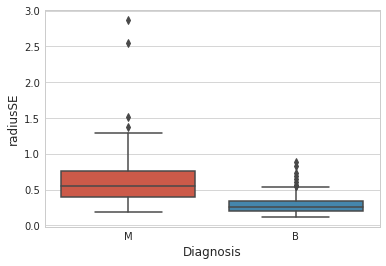

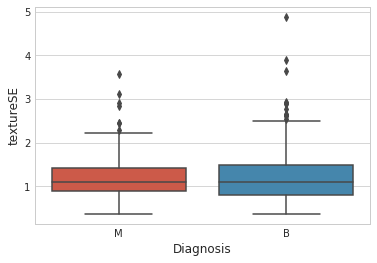

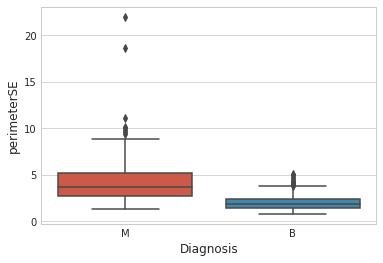

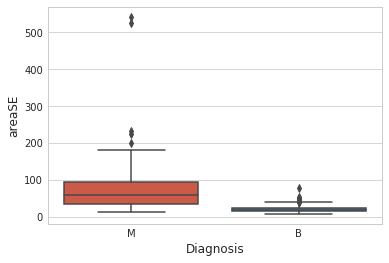

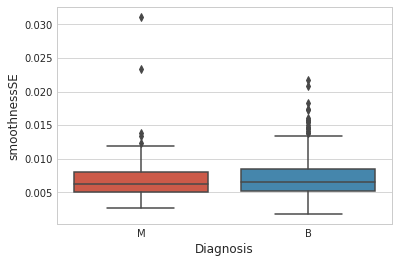

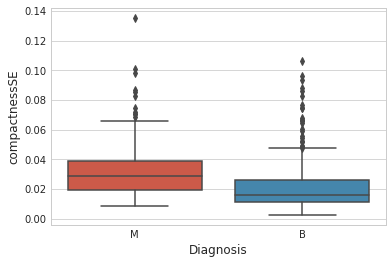

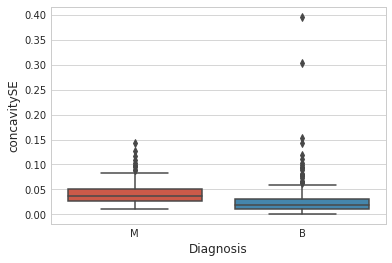

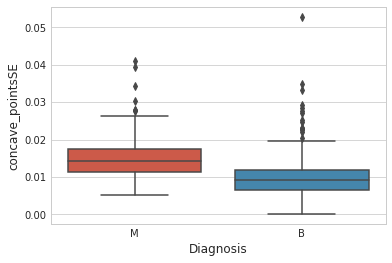

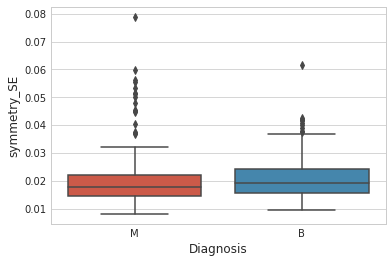

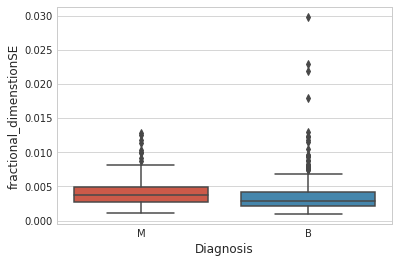

In [0]:
for i in ('radiusSE', 'textureSE', 'perimeterSE','areaSE', 'smoothnessSE','compactnessSE','concavitySE'
,'concave_pointsSE', 'symmetry_SE', 'fractional_dimenstionSE'):
  plt.figure()
  sns.boxplot(x='Diagnosis', y= i, data=df)

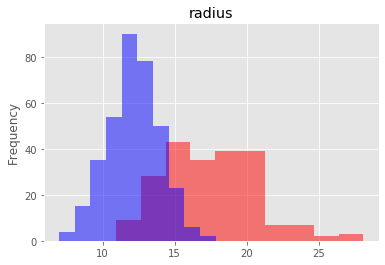

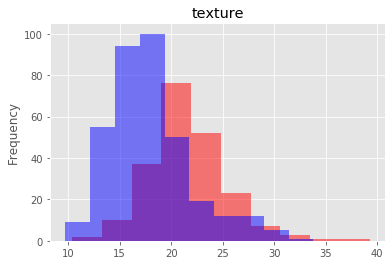

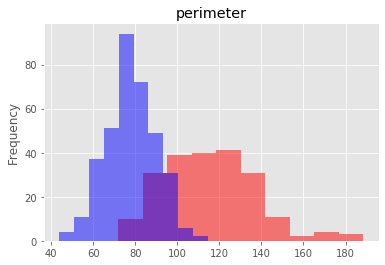

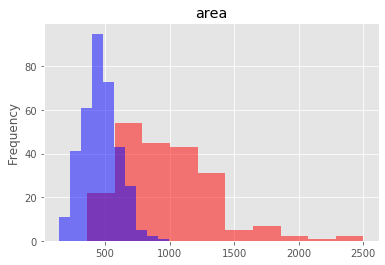

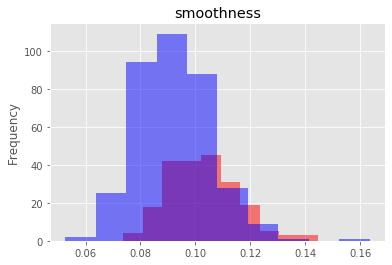

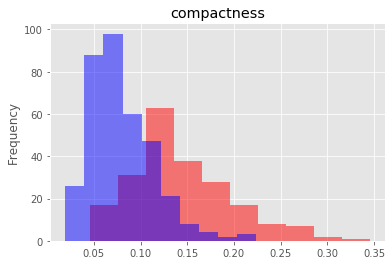

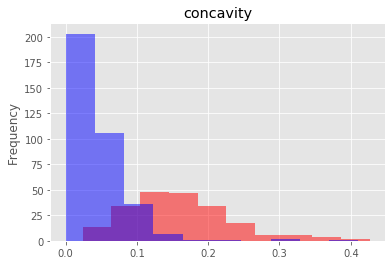

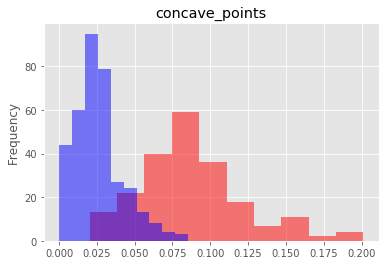

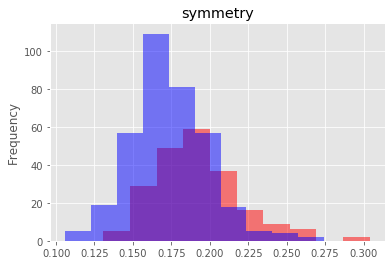

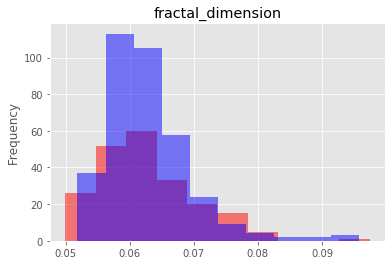

In [0]:
# Histogram plotting to visual the data frequency and density plotting for overall data distribution.
# less malignant data available here, most is benign as shown
for i in ('radius', 'texture', 'perimeter','area', 'smoothness','compactness','concavity'
,'concave_points', 'symmetry','fractal_dimension'):
  plt.figure()
  df[i][df['Diagnosis'] == 'M'].plot.hist(alpha =0.5, color = 'red', title = i)
  df[i][df['Diagnosis'] == 'B'].plot.hist(alpha =0.5, color = 'blue')
  plt.show()


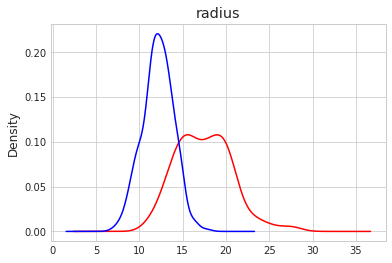

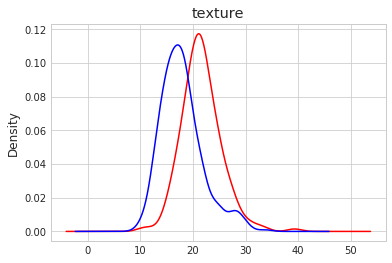

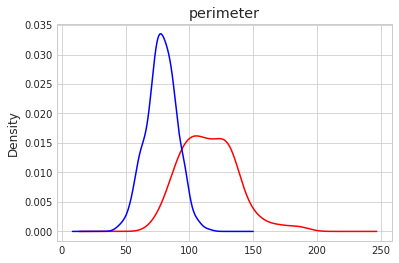

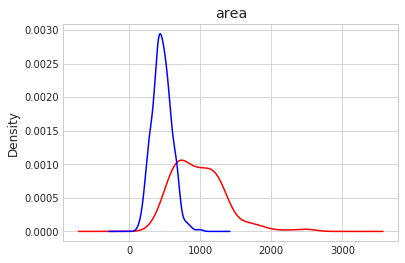

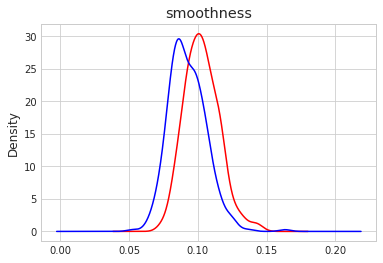

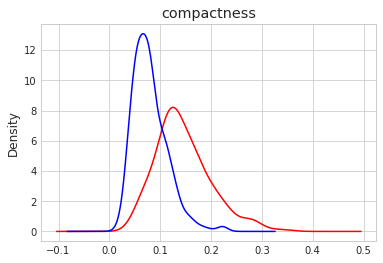

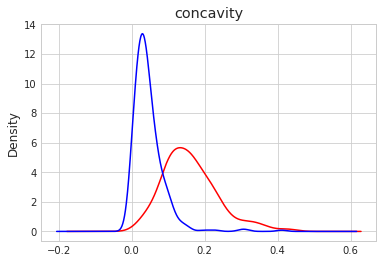

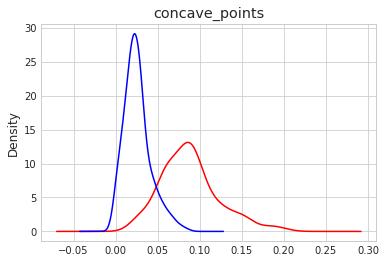

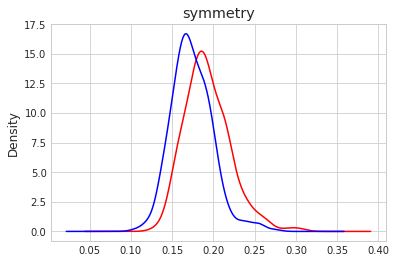

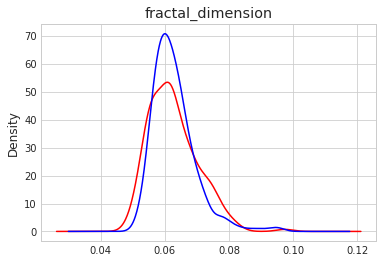

In [0]:
# to estimate the probability density function (PDF) of a random variable using plot.kde
# here we see that results are positively skewed as shown

for i in ('radius', 'texture', 'perimeter','area', 'smoothness','compactness','concavity'
,'concave_points', 'symmetry','fractal_dimension'):
  df[i][df['Diagnosis']=='M'].plot.kde(title = i, c='r')
  df[i][df['Diagnosis']=='B'].plot.kde(title = i, c='b')

  plt.show()


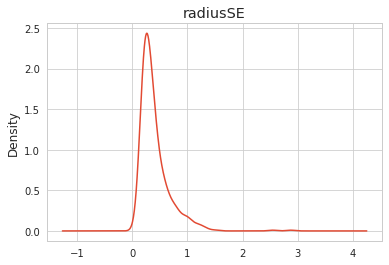

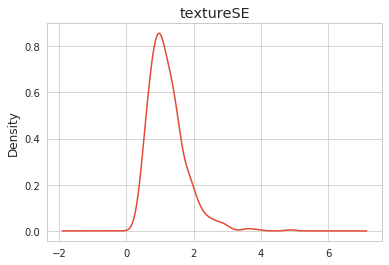

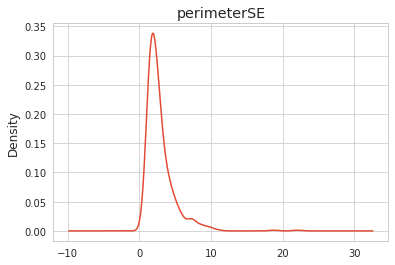

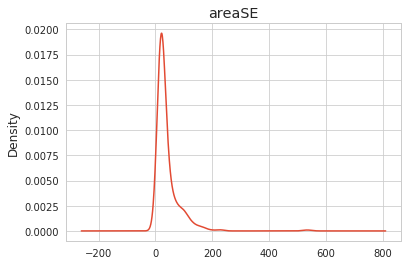

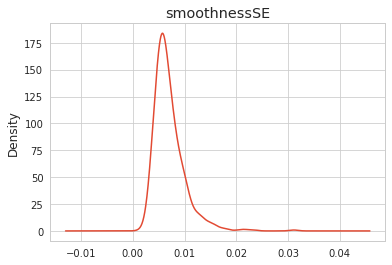

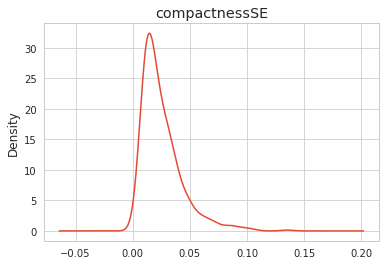

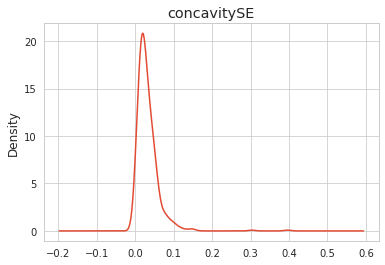

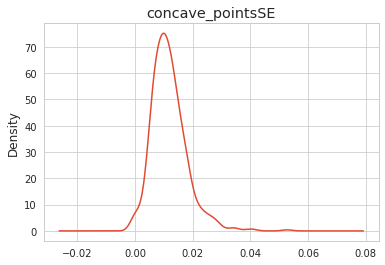

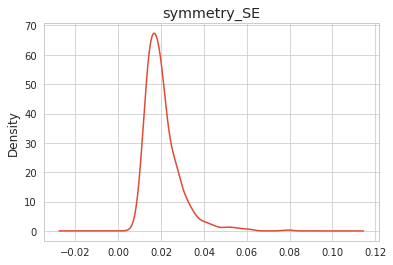

KeyError: ignored

In [0]:
# Now we will plot histogram for the SE
for i in ('radiusSE', 'textureSE', 'perimeterSE','areaSE', 'smoothnessSE','compactnessSE','concavitySE'
,'concave_pointsSE', 'symmetry_SE','fractal_dimensionSE'):
  df[i].plot.kde(title = i)
  plt.show()

In [0]:
df.corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointsSE,symmetry_SE,fractional_dimenstionSE,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractional_dimensionsW
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


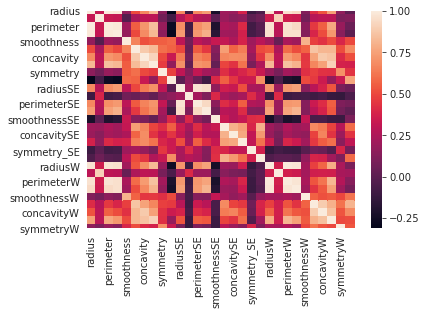

In [0]:
# correlation matrix between variables as shown


sns.heatmap(df.corr())
sns.set_style("whitegrid")
plt.show()


In [0]:
# features will be X and Y is the Diagnosis feature (B, and M)
x = df.iloc[:,1:]
y = df['Diagnosis'].copy()
y =y.map({'B':0, 'M':1})
x
y

NameError: ignored

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(test_size=0.3, random_state=12)
for train_index, test_index in sss.split(x,y):
  print("TRAIN:", train_index, "\n TEST:", test_index)
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]


TRAIN: [552 100 315  39 553  80 159   7 400  72 508 295 486 189 266 331  84 215
 116 489 474 494  19  97  37  50   0 534 177 154 191   4 436 302 214 410
 490 166 476  53 260 287 528 500  90 403 507   6 370 548 239  28 151 444
 430  35 523   3 540 272 414  93  30  92 307 288 473   5 264 290 132 413
 156 387 543  25 371 122 396 471 261  73 477 547 360 121 564 429  86 485
 511  69 346 309 382 105 118  58 468 406  75  78 276 124 201 426 320 161
  51 123  36 225  91 279 270 533  14 199 388 459 332  85 217 162  29 236
 496  23 262   1 127 363 542 565 401 355  83 555 113 504 297 278 554 536
 417 458  95 134 502  11 411 212 205 223 391 456 284 310  56 343 316 285
  49 170 337 102 152 335 383 356 327 420 106 268 277 240 208 461 312 328
 465 439 497  70 478 457 249 342 446 499 352 545 257 463 128 218  74  20
 198  67 165 475 484 369 169 109 111  79  60 318 512 361  47 546 143 271
  13 325  31  26 196 141 112  66  82 479 447 273 349 296 334 470 197 389
 556 353   2 305 541 483 210 491 517 365 501

In [0]:
# dimensionality reduction here
 print(X_train.var())


radius                         11.301380
texture                        18.912156
perimeter                     539.740160
area                       106640.262040
smoothness                      0.000193
compactness                     0.002774
concavity                       0.006601
concave_points                  0.001531
symmetry                        0.000773
fractal_dimension               0.000049
radiusSE                        0.054942
textureSE                       0.319115
perimeterSE                     2.778547
areaSE                       1133.819025
smoothnessSE                    0.000009
compactnessSE                   0.000334
concavitySE                     0.001081
concave_pointsSE                0.000037
symmetry_SE                     0.000065
fractional_dimenstionSE         0.000007
radiusW                        21.065946
textureSW                      37.014791
perimeterW                   1022.486614
areaW                      278229.837205
smoothnessW     

In [0]:
from sklearn.preprocessing import Normalizer
# The normalize features to account for feature scaling

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

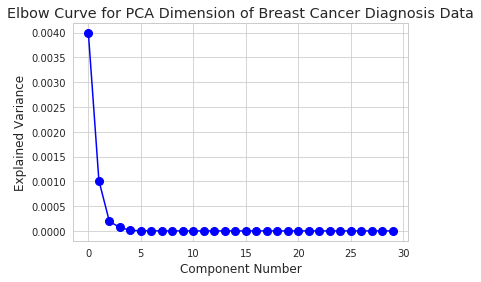

In [0]:
# Instantiate PCA for the train data
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_train_norm)

# Visualize explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

In [0]:
## Here we will do feature selection
# Instantiate new logistic regression for use with scikit-learn's recursive feature elimination...
# with cross validation (RFECV)
lr_2 = LogisticRegression()

# Instantiate RFECV with logistic regression classifier
selector = RFECV(lr_2, cv = 10, scoring='accuracy')

# Fit RFECV to training data
selector.fit(X_train_norm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [0]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Model Accuracy %")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

print('Logistic Regression Model Accuracy with Feature Elimination')
print('Optimal number of features: {}'.format(selector.n_features_))
print([i for i in list(df.columns[selector.support_])])
plt.show()

NameError: ignored

In [0]:
# now here we did RandomForestclassifier with hyper parameters tuning

from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameters
RF_params = {'n_estimators':[10,50,100,200], 'max_depth': [5,10,20,30,40,50]}

# Instantiate RFC
RFC_2 = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_2_grid = GridSearchCV(RFC_2, RF_params,scoring='accuracy',cv=10)

# Fit model to training data
RFC_2_grid.fit(X_train_norm, y_train)

# Print best parameters
print('Optimized number of estimators: {}'.format(RFC_2_grid.best_params_.values()))

Optimized number of estimators: dict_values([10, 50])


In [0]:
accuracy = RFC_2_grid.best_score_
accuracy

0.9547738693467337

In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
RFC_3 = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit RFC to training data
RFC_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
RFC_3_predicted = RFC_3.predict(X_test_norm)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, RFC_3_predicted)))
cm = confusion_matrix( y_test , RFC_3_predicted)
print(classification_report(y_test, RFC_3_predicted))




Model accuracy on test data: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       107
           1       0.95      0.95      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [0]:
# now here we did RandomForestclassifier with hyper parameters tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Parameters
DTC_params = {'max_depth': [5,10,20,30,40,50]}

# Instantiate RFC
DTC_2 = DecisionTreeClassifier()

# Instantiate gridsearch using RFC model and dictated parameters
DTC_2_grid = GridSearchCV(DTC_2, DTC_params,scoring='accuracy',cv=10)

# Fit model to training data
DTC_2_grid.fit(X_train_norm, y_train)

# Print best parameters
print('Optimized number of estimators: {}'.format(DTC_2_grid.best_params_.values()))
accuracy = DTC_2_grid.best_score_
accuracy

Optimized number of estimators: dict_values([50])


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9246231155778895

In [0]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
DTC_3 = DecisionTreeClassifier(max_depth=20)

# Fit RFC to training data
DTC_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
DTC_3_predicted = DTC_3.predict(X_test_norm)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, DTC_3_predicted)))
print(classification_report(y_test, DTC_3_predicted))

cm = confusion_matrix( y_test , DTC_3_predicted)
cm

Model accuracy on test data: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.90      0.95      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



array([[100,   7],
       [  3,  61]])

In [0]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)
# Parameters
ADA_params = {'learning_rate': [20,30,40,50] ,'n_estimators':[10,50,100,200]}

# Instantiate RFC
ADA_2 = AdaBoostClassifier(base_estimator = DTC)

# Instantiate gridsearch using RFC model and dictated parameters
ADA_2_grid = GridSearchCV(ADA_2, ADA_params,scoring = 'roc_auc')

# Fit model to training data
ADA_2_grid.fit(X_train_norm, y_train)

# Print best parameters
print('Optimized number of estimators: {}'.format(ADA_2_grid.best_params_.values()))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Optimized number of estimators: dict_values([40, 10])


In [0]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
ADA_3 = AdaBoostClassifier(learning_rate=40, n_estimators=10)

# Fit RFC to training data
ADA_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
ADA_3_predicted = ADA_3.predict(X_test_norm)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, ADA_3_predicted)))
print(classification_report(y_test, ADA_3_predicted))

cm = confusion_matrix( y_test , ADA_3_predicted)
print('confusion matrix\n ',cm)

Model accuracy on test data: 0.6257309941520468
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171

confusion matrix
  [[107   0]
 [ 64   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:546: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:171: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:545: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:546: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/usr/local/lib/python3.6/dist-packages/sklear